# Project: Investigate a dataset (Gapminder World datasets!)

###    *By Emmanuella Onyima*

## Table of Content

>- [Introduction]()
>- [Data Wrangling]()
>- [Exploratory Data Analysis]()
>- [Conclusion]()

## Introduction
> In this report, three datasets were used as indicators, to observe trends and growth of different countries, in respect to the selected indicators, over a period of twenty years (2000 - 2019).

> These indicators will be used to answer the following questions:
>- What country has the highest population growth?
>- What countries had the highest and lowest breast cancer rates?
>- what countries had the highest and lowest female employments?
>- Are there any correlations between these three indicators?


> These datasets were downloaded from the [Gapminder world website](http://www.gapminder.org/data/), a website that has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. 

> **The three indicator datasets includes**:

>- **Population**: this is the total population records of each country for each given year. 
>- **Female_employment**: this is the percentage of female population, age group 15-24 that has been employed during the given year.
>- **Breast_cancer**: total number of new female cases of breast cancer during the certain year.


>Its time to dive into our datasets to clean, organize, explore and answer questions. 

In [2]:
#importing all modules and command lines
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Magic command
%matplotlib inline

# Data Wrangling

>First we start by loading our datasets.

### General properties

In [3]:
# loading the datasets
population = pd.read_csv('population_total.csv')
breast_cancer = pd.read_csv('breast_cancer_number_of_new_female_cases.csv')
female_employment = pd.read_csv('females_aged_15_24_employment_rate_percent.csv') 


In [4]:
#printing the first two lines of the population dataset
population.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M


In [5]:
#printing the first two lines of the breast_cancer dataset
breast_cancer.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,644,661,694,726,748,761,776,794,809,...,1260,1330,1400,1470,1530,1590,1680,1770,1870,1950
1,Angola,383,400,421,447,470,484,487,509,553,...,1100,1180,1250,1310,1360,1460,1560,1690,1820,1940


In [6]:
#printing the first two lines of the female_employment dataset
female_employment.head(2)

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,11.1,11.1,11.1,11.0,11.0,10.9,10.7,10.7,10.6,...,10.8,11.2,11.6,12.3,13.1,13.8,14.7,15.6,15.9,16.3
1,Angola,55.8,55.7,55.8,55.8,55.7,55.6,55.7,55.5,55.3,...,46.4,49.2,49.1,49.1,49.1,49.1,49.2,49.1,49.0,48.8


> The numbered columns represents the years the records were taken. For this analysis, we would be working with the year range of 2000 - 2019.

> For a better understanding of our data, we would also be reshaping our data's heading into a row.

> Let's take a deep look into our datasets.

In [6]:
#observe the shape of the population dataset
population.shape

(197, 302)

In [7]:
#check the shape of the breast_cancer dataset
breast_cancer.shape

(206, 31)

In [8]:
#check the shape of the female_employment dataset
female_employment.shape

(189, 30)

>The ***.shape*** function displays the number of rows and columns in each dataset. This indicates that there are inconsistencies in the number of row and columns of the three datasets, with the population data having the highest number of columns.

> To join the four datasets, we would need to drop the years columns not within the 1999 - 2019 range

In [7]:
#dropping the columns that are not needed in the population dataset
population.drop(population.loc[:, '1800':'1999'], axis = 1, inplace = True)
population.drop(population.loc[:, '2020':], axis = 1, inplace = True)

In [8]:
#dropping the columns that are not needed in the breast_cancer dataset
breast_cancer.drop(breast_cancer.loc[:, '1990':'1999'], axis = 1, inplace =True)

In [9]:
#dropping the columns that are not needed in the female_employment dataset
female_employment.drop(female_employment.loc[:, '1991':'1999'], axis = 1, inplace = True)

In [10]:
#rechecking the first few lines of the population dataset
population.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,20.8M,21.6M,22.6M,23.7M,24.7M,25.7M,26.4M,27.1M,27.7M,...,29.2M,30.1M,31.2M,32.3M,33.4M,34.4M,35.4M,36.3M,37.2M,38M
1,Angola,16.4M,16.9M,17.5M,18.1M,18.8M,19.4M,20.1M,20.9M,21.7M,...,23.4M,24.2M,25.1M,26M,26.9M,27.9M,28.8M,29.8M,30.8M,31.8M
2,Albania,3.13M,3.13M,3.13M,3.12M,3.1M,3.09M,3.06M,3.03M,3M,...,2.95M,2.93M,2.91M,2.9M,2.9M,2.89M,2.89M,2.88M,2.88M,2.88M
3,Andorra,65.4k,67.3k,70k,73.2k,76.3k,78.9k,81k,82.7k,83.9k,...,84.5k,83.7k,82.4k,80.8k,79.2k,78k,77.3k,77k,77k,77.1k
4,United Arab Emirates,3.13M,3.3M,3.48M,3.71M,4.07M,4.59M,5.3M,6.17M,7.09M,...,8.55M,8.95M,9.14M,9.2M,9.21M,9.26M,9.36M,9.49M,9.63M,9.77M


>The next step is to reshape the datasets 

In [11]:
#reshaping the population dataset
df_population = population.melt(id_vars='country',
                  var_name="year",
                  value_name="population")
df_population

,country,year,population
0,Afghanistan,2000,20.8M
1,Angola,2000,16.4M
2,Albania,2000,3.13M
3,Andorra,2000,65.4k
4,United Arab Emirates,2000,3.13M
...,...,...,...
3935,Samoa,2019,197k
3936,Yemen,2019,29.2M
3937,South Africa,2019,58.6M
3938,Zambia,2019,17.9M


In [12]:
#reshaping the breast_cancer dataset
df_breast_cancer =breast_cancer.melt(id_vars='country',
                  var_name="year",
                  value_name="breast_cancer")
df_breast_cancer

,country,year,breast_cancer
0,Afghanistan,2000,842
1,Angola,2000,627
2,Albania,2000,392
3,Andorra,2000,30.2
4,United Arab Emirates,2000,207
...,...,...,...
4115,Samoa,2019,34.9
4116,Yemen,2019,2000
4117,South Africa,2019,8540
4118,Zambia,2019,1170


In [13]:
#reshaping the female_employment dataset
df_female_employment =female_employment.melt(id_vars='country',
                  var_name="year",
                  value_name="female_employment")
df_female_employment

,country,year,female_employment
0,Afghanistan,2000,10.60
1,Angola,2000,55.20
2,Albania,2000,37.30
3,United Arab Emirates,2000,22.10
4,Argentina,2000,24.20
...,...,...,...
3775,Samoa,2019,19.40
3776,Yemen,2019,3.00
3777,South Africa,2019,8.74
3778,Zambia,2019,40.00


> The datasets have been reshaped for merging, using the melt function.

>Now, I will merge the three datasets using the ***pd.merge()*** function, to form a single dataset for the analysis.

In [14]:
#merging the first two datasets
df = pd.merge(df_population, df_breast_cancer, on = ['country', 'year'], how = 'outer')

#finally merging the resulting datasets
Gapminder_data = pd.merge(df, df_female_employment, on = ['country', 'year'], how ='outer')

#checking the shape of the merged data
Gapminder_data.shape


(4260, 5)

In [17]:
Gapminder_data.tail(5)

,country,year,population,breast_cancer,female_employment
4255,New Caledonia,2018,NaN,NaN,24.7
4256,Channel Islands,2019,NaN,NaN,39.0
4257,Western Sahara,2019,NaN,NaN,13.2
4258,"Macao, China",2019,NaN,NaN,43.4
4259,New Caledonia,2019,NaN,NaN,25.3


>The *outer* join is used to make sure that no data is thrown away due to mismatched labels.

In [15]:
#looking at the overview of the data
Gapminder_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 0 to 4259
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            4260 non-null   object 
 1   year               4260 non-null   object 
 2   population         3940 non-null   object 
 3   breast_cancer      4082 non-null   object 
 4   female_employment  3780 non-null   float64
dtypes: float64(1), object(4)
memory usage: 199.7+ KB


>From the above information, the resulting data (Gapminder_dataset) has 4260 rows or entries and 5 columns or features. There are missing values in the data due to mismatched labels resulting from unrecorded data entries before the analysis. 

# Data Cleaning

> After merging the ***df_population***, ***df_breast_cancer*** and the ***df_female_employment*** datasets, the next step is cleaning the data.



In [16]:
#Dropping the missing values
Gapminder_data.dropna(inplace = True)

> Now the missing data have been dropped 

In [17]:
#checking the datatypes
Gapminder_data.dtypes

country               object
year                  object
population            object
breast_cancer         object
female_employment    float64
dtype: object

In [18]:
#checking the first few lines of the data
Gapminder_data.head()

,country,year,population,breast_cancer,female_employment
0,Afghanistan,2000,20.8M,842,10.6
1,Angola,2000,16.4M,627,55.2
2,Albania,2000,3.13M,392,37.3
4,United Arab Emirates,2000,3.13M,207,22.1
5,Argentina,2000,36.9M,12.6k,24.2


> The population and breast_cancer column are objectdatatypes containing 'M', 'K', and 'B' letters, which needs to be cleaned.

In [19]:
#writing a function to convert the population and breast_cancer columns to floats
def million(x):
    if 'M' in x:
        return f"{(float(x.strip('M'))*1000000)}"
    elif 'k' in x:
        return f"{(float(x.strip('k'))*1000)}"
    elif 'B' in x:
        return f"{(float(x.strip('B'))* 1000000000)}"
    else:
        return x

In [20]:
#applying the function to the population column
Gapminder_data['population'] = Gapminder_data['population'].apply(million)

In [21]:
#applying the function to the breast_cancer column
Gapminder_data['breast_cancer'] = Gapminder_data['breast_cancer'].apply(million)

In [22]:
#converting the population column to int data type
Gapminder_data['population'] = Gapminder_data['population'].astype('float')
Gapminder_data['population'] = Gapminder_data['population'].astype('int')

In [23]:
#converting the breast_cancer column to int data type
Gapminder_data['breast_cancer'] = Gapminder_data['breast_cancer'].astype('float')
Gapminder_data['breast_cancer'] = Gapminder_data['breast_cancer'].astype('int')

In [59]:
#printing the data
Gapminder_data

,country,year,population,breast_cancer,female_employment
0,Afghanistan,2000,20800000,842,10.60
1,Angola,2000,16399999,627,55.20
2,Albania,2000,3130000,392,37.30
4,United Arab Emirates,2000,3130000,207,22.10
5,Argentina,2000,36900000,12600,24.20
...,...,...,...,...,...
3935,Samoa,2019,197000,34,19.40
3936,Yemen,2019,29200000,2000,3.00
3937,South Africa,2019,58600000,8540,8.74
3938,Zambia,2019,17900000,1170,40.00


In [25]:
#rechecking the data types of our dataset columns
Gapminder_data.dtypes

country               object
year                  object
population             int32
breast_cancer          int32
female_employment    float64
dtype: object

In [26]:
#checking for duplicated values
Gapminder_data.duplicated().sum()

0

> there are no duplicated values in the data, which is good for our analysis.

# Exploratory Data Analysis

> Here we will discover patterns, and trends using the visualization tools as our data is now clean.

In [27]:
#checking the statistical overview
Gapminder_data.describe()

,population,breast_cancer,female_employment
count,3.600000e+03,3600.000000,3600.000000
mean,3.835931e+07,8585.219444,32.732292
std,1.401085e+08,27933.759894,17.449997
min,9.800000e+04,8.000000,1.820000
25%,2.910000e+06,366.750000,20.200000
50%,8.965000e+06,1250.000000,29.100000
75%,2.612500e+07,5240.000000,44.625000
max,1.430000e+09,368000.000000,78.300000


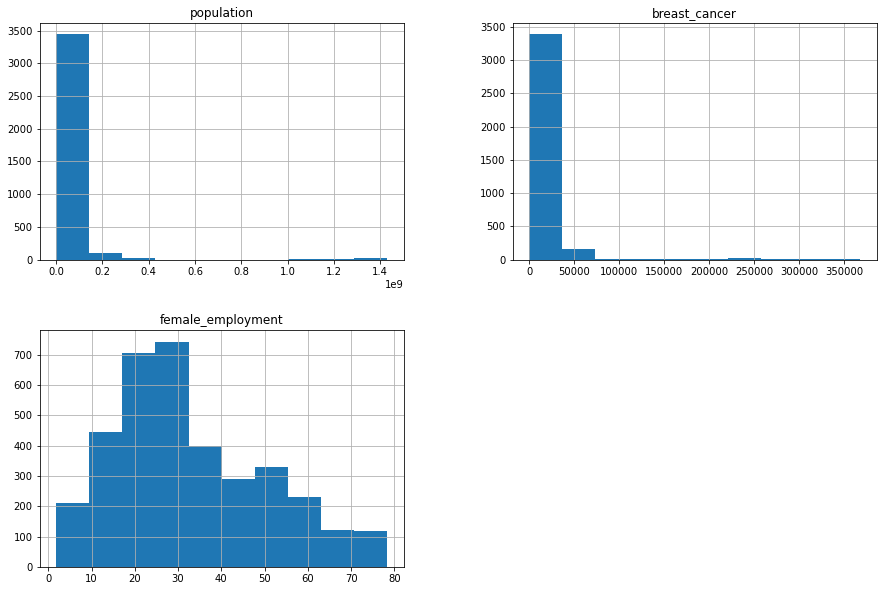

In [28]:
#plotting the histogram of the data
Gapminder_data.hist(figsize= (15, 10));

>From the above descriptions, a few conclusions can be made:

>- Most countries fall within the population range of approximately 20,000,000 people.
>- Most countries had less than 25000 breast cancer cases.
>- There were 18% - 32% of female polution of age 15-24 that were employed in most countries.

In [29]:
#checking the number of countries we are working with
Gapminder_data['country'].nunique()

180

> With the shape of 180 rows, it means we will be exploring data across 180 different countries.

## Question 1: What countries has the highest and lowest population 

In [30]:
#converting to the mean population, breast cancer rates, and female_employment rates for the twenty years period using groupby.
final_data = Gapminder_data.groupby('country')[['population', 'female_employment', 'breast_cancer']].mean()
#renaming our Gapminder_data columns

final_data = final_data.rename(columns = {'population': 'mean_population', 'female_employment': 'mean_female_employment', 'breast_cancer': 'mean_breast_cancer'})

>Using the groupby() function, the mean of the indicators are obtained over a period of twenty years, for a summarised analysis.

In [31]:
#resetting the index
final_data = final_data.reset_index()

> Resetting the data index makes the index (country) a column for easy analysis.

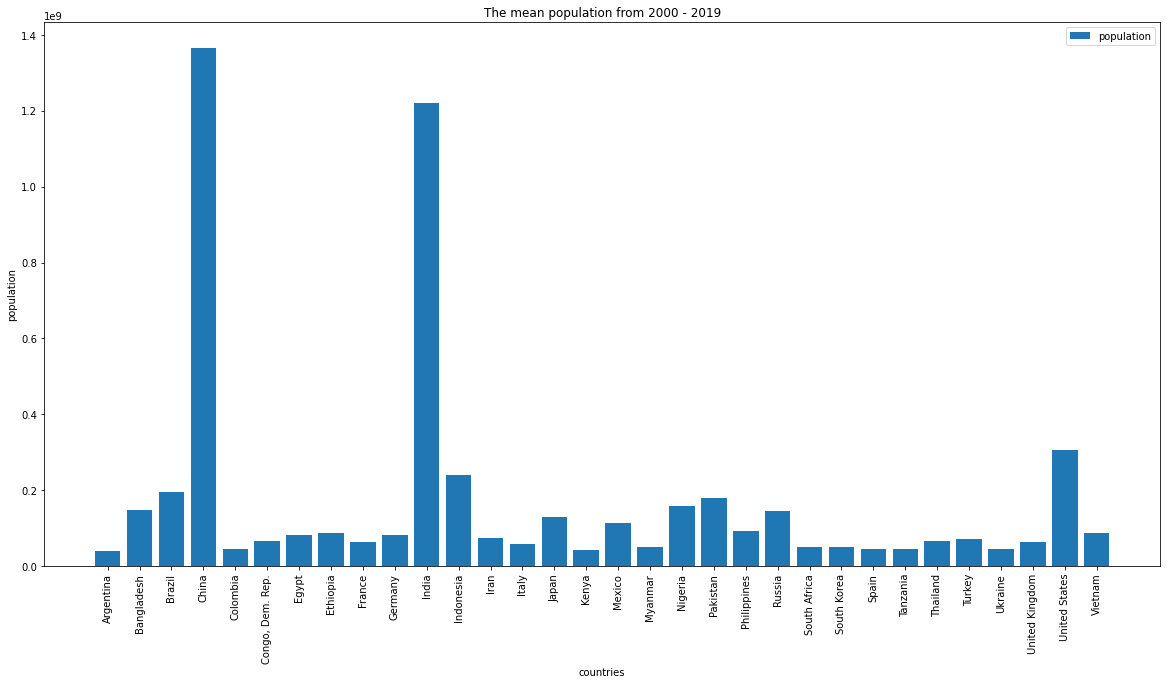

In [32]:
#we start by dividing the data into two according to the mean.
larger_country = final_data[final_data['mean_population'] >= final_data['mean_population'].mean()] #those greater than mean
smaller_country = final_data[final_data['mean_population'] <= final_data['mean_population'].mean()] #those less than mean

#ploting for the larger countries
plt.figure(figsize=[20,10])
plt.bar(larger_country['country'], larger_country['mean_population'], label = 'population')
plt.xticks(rotation = 90)
plt.ylabel('population')
plt.xlabel('countries')
plt.title('The mean population from 2000 - 2019')
plt.legend();

> China and India shows a considerable amount of increased population with china being the highest populous country

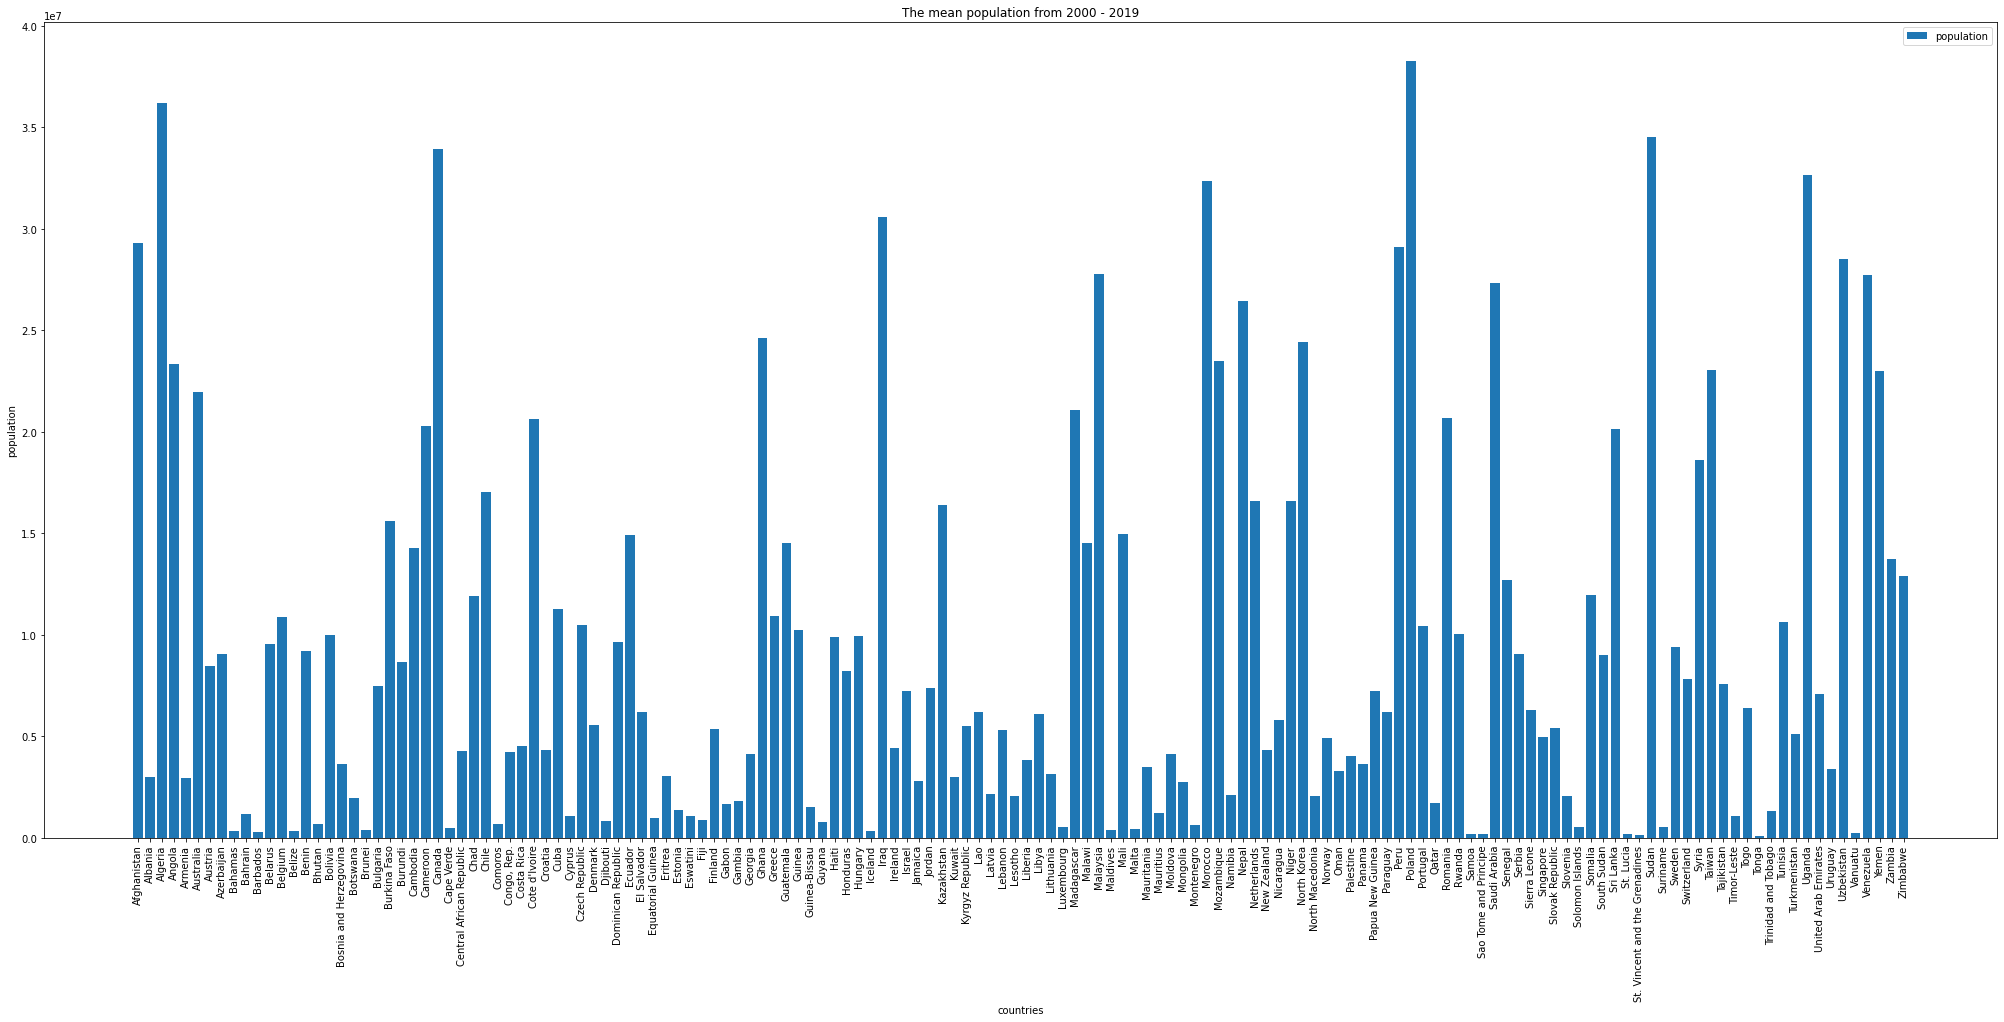

In [33]:
#creating a bar chart for the smaller countries
plt.figure(figsize=[35,15])
plt.bar(smaller_country['country'], smaller_country['mean_population'], label = 'population')
plt.xticks(rotation = 90)
plt.ylabel('population')
plt.xlabel('countries')
plt.title('The mean population from 2000 - 2019')
plt.legend();

> The smaller_country data states the countries with population lower than the mean. In  the above plot, countries such as Samoa, Sao Tome Principe, St Lucia, St. Vincent and the Grenadines, Vanuatu and Tonga shows a decreased mean population with Tonga having the lowest population.

In [36]:
#confirming the country with the smallest population
larger_country[larger_country['mean_population'] == larger_country['mean_population'].max()]

,country,mean_population,mean_female_employment,mean_breast_cancer
33,China,1.364500e+09,49.08,239100.0


> China records the highest mean population of approximately 1,364,500,000 people and Tonga the lowest with a mean population of 101,655 people

# Question 2: What countries had the highest and lowest breast cancer rates?

In [38]:
#checking for the highest and lowest breast cancer rate
final_data['mean_breast_cancer'].min(), final_data['mean_breast_cancer'].max()

(12.45, 239100.0)

In [39]:
#filtering the lowest breast cancer rate
final_data[final_data['mean_breast_cancer'] == 12.45]

,country,mean_population,mean_female_employment,mean_breast_cancer
134,Sao Tome and Principe,177300.0,14.94,12.45


In [40]:
final_data[final_data['mean_breast_cancer'] ==239100 ]

,country,mean_population,mean_female_employment,mean_breast_cancer
33,China,1.364500e+09,49.08,239100.0


> *China* also records as the country with the highest mean breast cancer cases of 239100, and '*Sao Tome and Principe*' as the country with the lowest with 12.45 cases. This could be as a result of large population of China and a very low population of *Sao Tome and Principe*

# What Countries had the highest and lowest female employment rates?

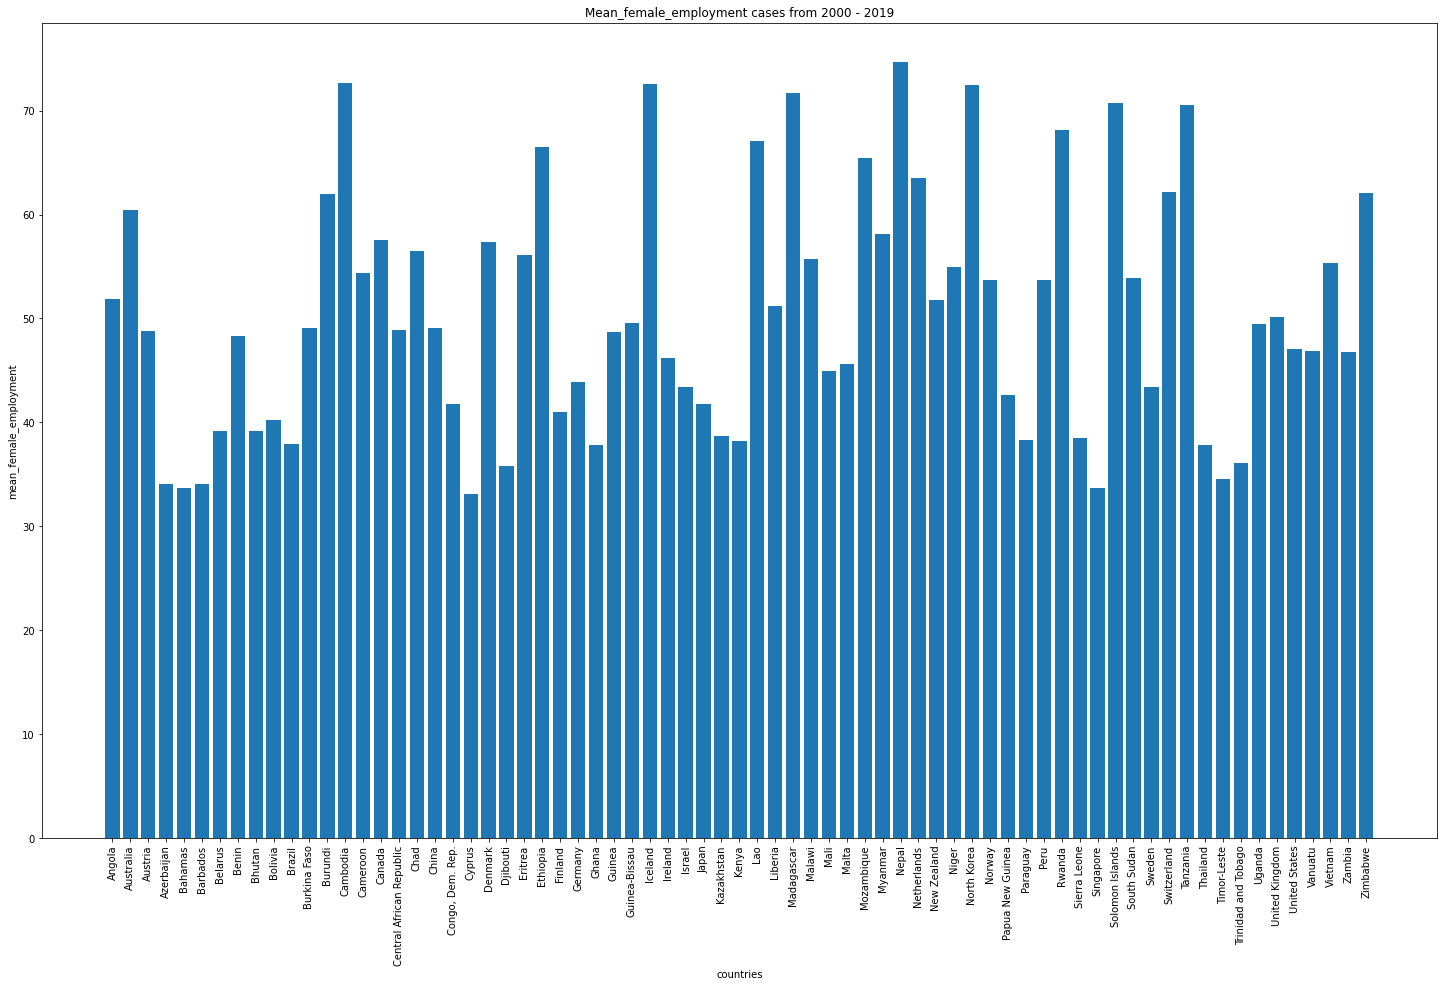

In [41]:
#creating chart for the female employment rates in countries with higher rates
plt.figure(figsize= (25, 15))
larger_female_employment = final_data[final_data['mean_female_employment'] >= final_data['mean_female_employment'].mean()]
plt.bar(larger_female_employment['country'], larger_female_employment['mean_female_employment'])
plt.xticks(rotation = 90)
plt.xlabel('countries')
plt.ylabel('mean_female_employment')
plt.title('Mean_female_employment cases from 2000 - 2019');


> With the female employment data greater than the mean, countries such as Cambodia, Iceland, Nepal, Tanzania, and North Korea has shown a considerable increase in the number of female employment rates, while Nepal showed the highest female employment rate of 74.68%.

In [42]:
#confirming the country with the lowest employment rate
larger_female_employment[larger_female_employment['mean_female_employment'] == larger_female_employment['mean_female_employment'].max()]

,country,mean_population,mean_female_employment,mean_breast_cancer
110,Nepal,26430000.0,74.68,2299.0


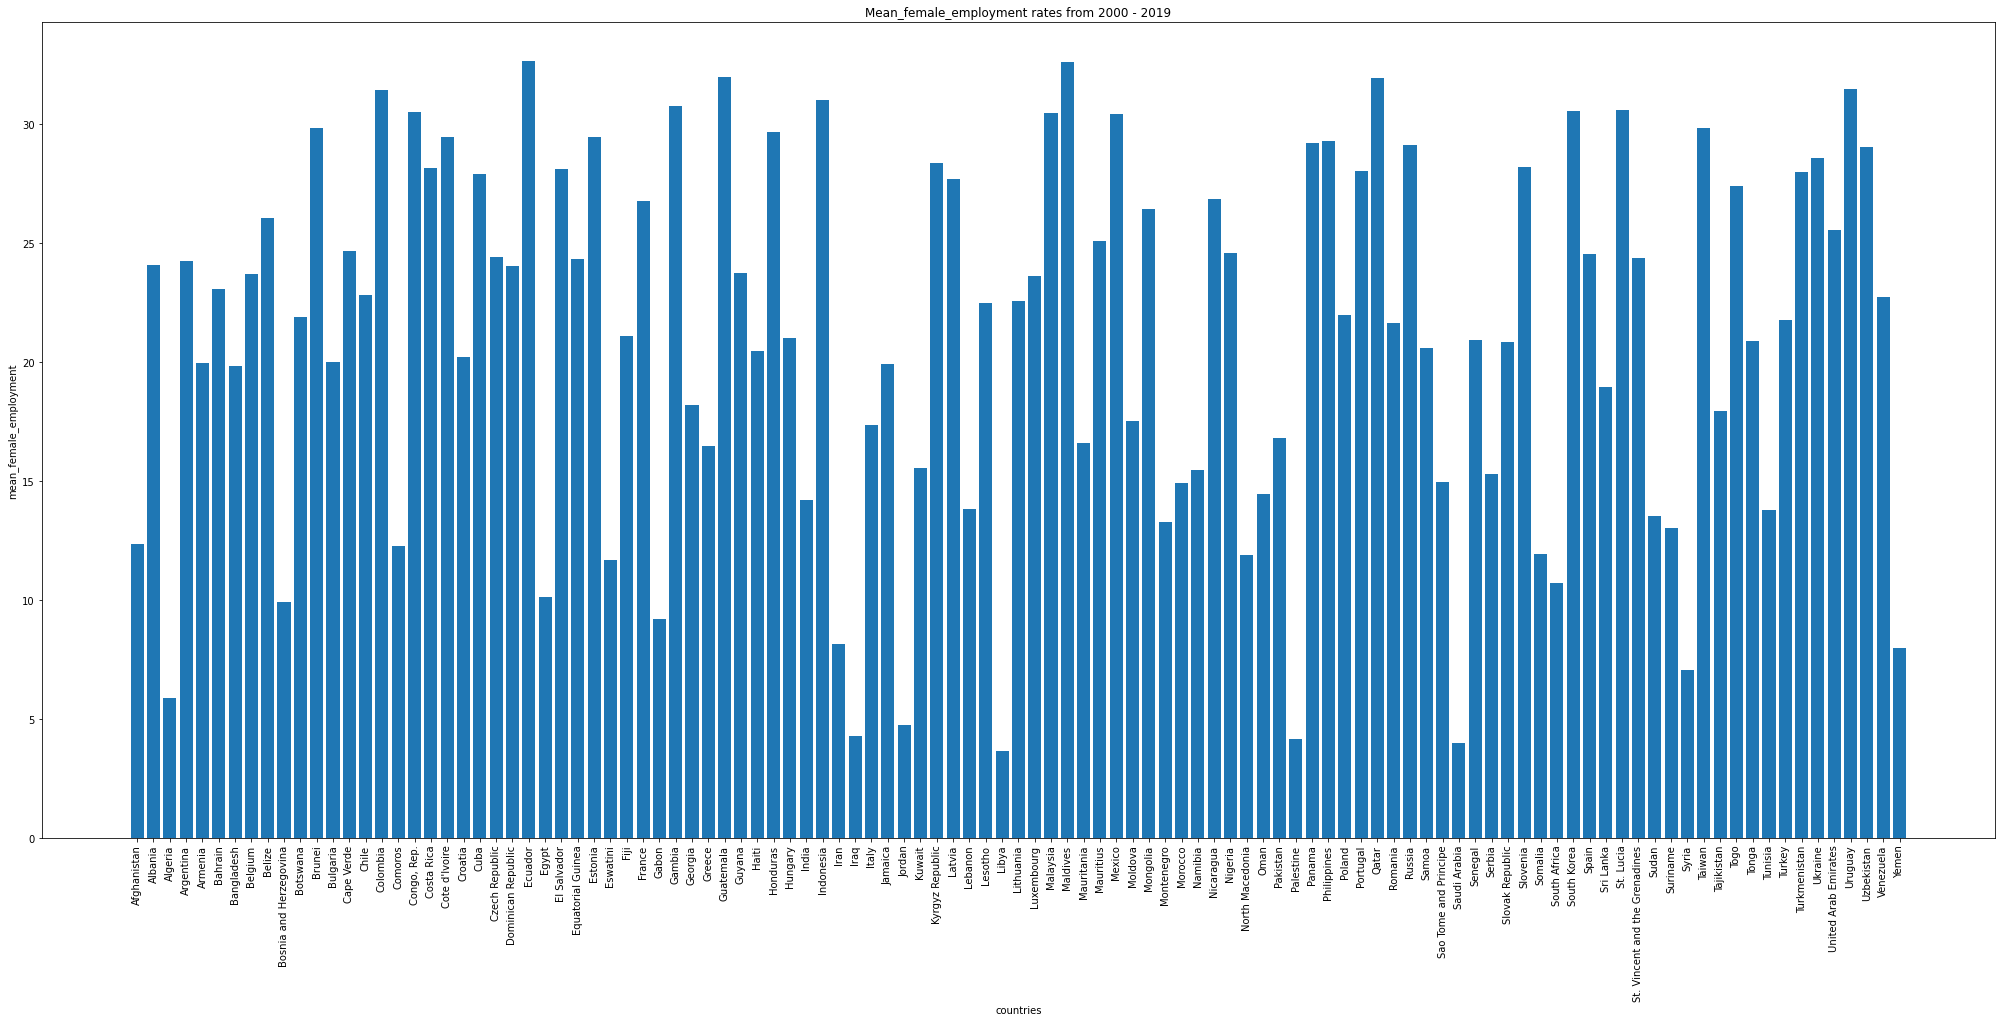

In [57]:
#creating chart for the female employment rates in countries with higher rates
plt.figure(figsize= (35, 15))
smaller_female_employment = final_data[final_data['mean_female_employment'] <= final_data['mean_female_employment'].mean()]
plt.bar(smaller_female_employment['country'], smaller_female_employment['mean_female_employment'])
plt.xticks(rotation = 90)
plt.xlabel('countries')
plt.ylabel('mean_female_employment')
plt.title('Mean_female_employment rates from 2000 - 2019');


> Saudi Arabia, Libya, Palestine, Iraq and Japan are countries with lower female employment rates, with Libya as the country with the lowest female employment rate of 3.6485%

In [44]:
#confirming the country with the lowest employment rate
smaller_female_employment[smaller_female_employment['mean_female_employment'] == smaller_female_employment['mean_female_employment'].min()]

,country,mean_population,mean_female_employment,mean_breast_cancer
91,Libya,6094000.0,3.6485,816.95


> Nepal records the highest female employment rate with 74.68% while Libya records the lowest female employment rate of 3.6485%   

# Are there any correlation between these three indicators?

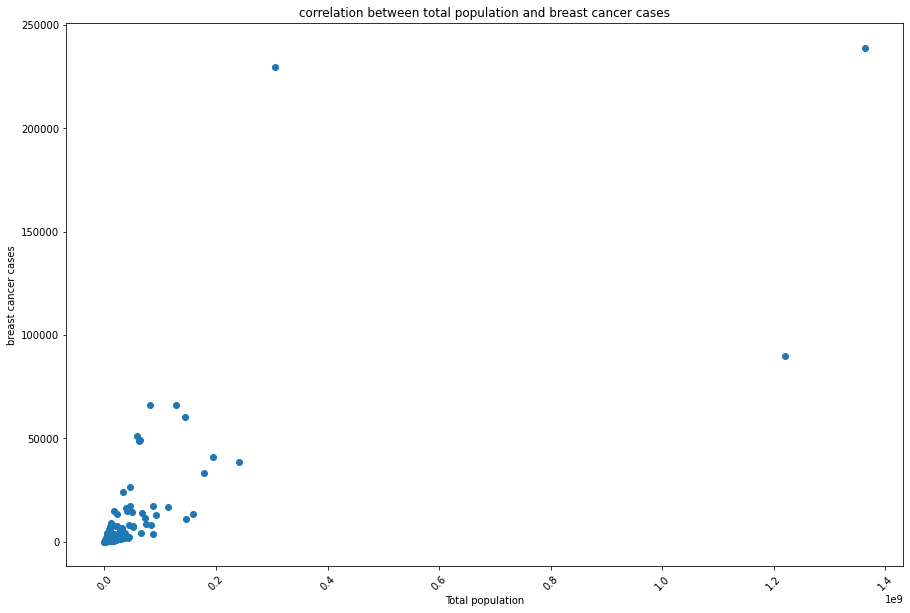

In [56]:
# creating a correlation plot betweeen mean_female_employment and Mean_breast_cancer
plt.figure(figsize=(15,10))
plt.scatter(final_data['mean_population'], final_data['mean_breast_cancer'])
plt.xticks(rotation = 45)
plt.xlabel('Total population')
plt.ylabel('breast cancer cases')
plt.title('correlation between total population and breast cancer cases');


>There is a positive correlation between the total population and the number of breast cancer cases, which simply means that a higher population produces more cases of breast cancer.

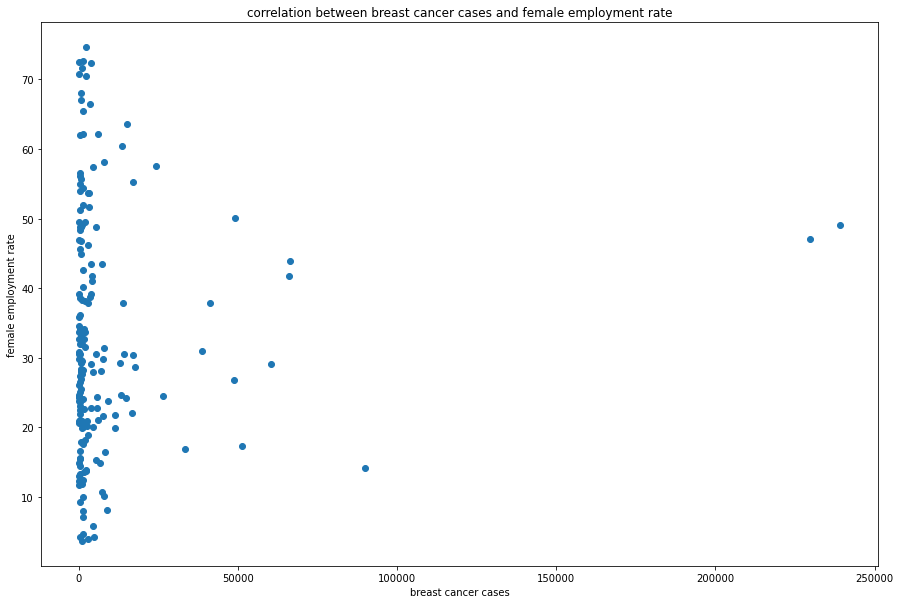

In [53]:
#checking the relationship between breast cancer cases and female employment rate
plt.figure(figsize = (15, 10))
plt.scatter(final_data['mean_breast_cancer'], final_data['mean_female_employment'])
plt.xlabel('breast cancer cases')
plt.ylabel('female employment rate')
plt.title('correlation between breast cancer cases and female employment rate');


> A slightly positive correlation is said to be observed between the female employment rates and the number of breast cancer cases. This could imply that female employments can have a slight impact in the number of breast cancer cases.

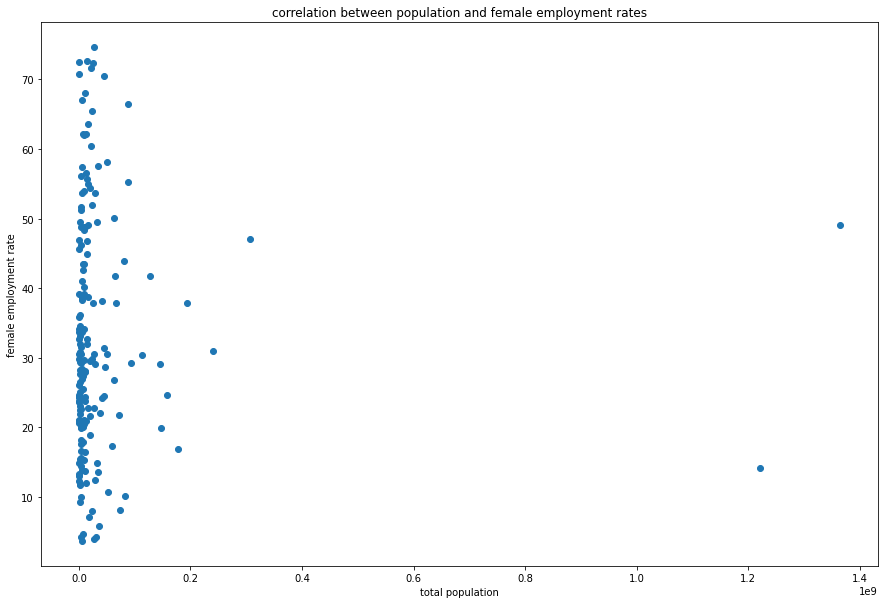

In [58]:
#checking the relationship between population and female employment rate
plt.figure(figsize = (15, 10))
plt.scatter(final_data['mean_population'], final_data['mean_female_employment'],label = 'mean_female_employment')
plt.xlabel('total population')
plt.ylabel('female employment rate')
plt.title('correlation between population and female employment rates');

> The female employment rates can also slightly be affected by the population, as there is a minimal correlation between the two indicators.

# Conclusion

> From the information obtained in our analysis, the following conclusions can be gathered:

>- **Correlations:** There is a slight positive relationship between breast cancer cases, the total population and the rate of female employments across the 180 countries.

>- **Population and breast cancer rate:** China was seen to have the highest total population of 1,364,500,000 people.

>- **Female employment:** Nepal with a mean total population of 26,430,000 has the highest female employment rate of 74.68%. Libya with the mean total population of 6,094,000 recorded the lowest female employment rate of 3.6485%

>- **Breast cancer rates:** the highest breast cancer cases of 239,100 was recorded in China, and *Sao Tome and Principe* as the country with the lowest population of 12.45 cases.



> **Limitation:**
>- There was no direct correlation to indicate the reason for increased or decreased female employment rates across the 
countries.
>- There were Complications in reshaping and merging the raw datasets.
>- Lots of uncollected data were observed in the raw datasets leading to unmatched labels after the merge.
>- Inconsistent number of countries in the datasets, lead to the dropping of most indicator data entries.

